# Network Analysis for Information Retrieval - Part 1

Elyes KHALFALLAH & Mohammed Ali EL ADLOUNI

16/03/2025

---

---


In [22]:
# Useful libraries
import nltk
import re
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from fonctions import *

# Downloading the necessary datasets for the nltk library
# Only downloads if necessary
nltk.download("stopwords", quiet=True)
nltk.download("wordnet", quiet=True)


True

---

## Exercice 1 : Acquisition des données


In [23]:
# Import data from data_project.csv
data = pd.read_csv("data_project.csv", sep="\t")

# Show the first 5 rows of the data
data.head()


,venue,abstract,authors,n_citation,references,title,year,id,class
0,international conference on human-computer int...,The purpose of this study is to develop a lear...,"['Makoto Satoh', 'Ryo Muramatsu', 'Mizue Kayam...",0,"['51c7e02e-f5ed-431a-8cf5-f761f266d4be', '69b6...",Preliminary Design of a Network Protocol Learn...,2013,00127ee2-cb05-48ce-bc49-9de556b93346,3
1,visual analytics science and technology,This paper describes the design and implementa...,"['Gareth Beale', 'Graeme Earl']",50,"['10482dd3-4642-4193-842f-85f3b70fcf65', '3133...",A methodology for the physically accurate visu...,2011,001c58d3-26ad-46b3-ab3a-c1e557d16821,3
2,pattern recognition and machine intelligence,This article applied GARCH model instead AR or...,"['Altaf Hossain', 'Faisal Zaman', 'Mohammed Na...",50,"['2d84c0f2-e656-4ce7-b018-90eda1c132fe', 'a083...","Comparison of GARCH, Neural Network and Suppor...",2009,001c8744-73c4-4b04-9364-22d31a10dbf1,4
3,international conference on computer graphics ...,NaN,"['Rafael Álvarez', 'Leandro Tortosa', 'José-Fr...",0,NaN,COMPARING GNG3D AND QUADRIC ERROR METRICS METH...,2009,005ce28f-ed77-4e97-afdc-a296137186a1,5
4,international symposium on computer and inform...,NaN,"['Guzin Ulutas', 'Mustafa Ulutas', 'Vasif V. N...",0,"['5626736c-e434-4e2d-8405-54940fab88ab', '8e87...",Improved Secret Image Sharing Method By Encodi...,2011,00701b05-684f-45f9-b281-425abfec482c,8


In [24]:
data.shape


(40596, 9)

In [25]:
data["class"].unique()


array([3, 4, 5, 8, 7, 1, 6, 2])

---

## Exercice 2: Prétraitement des données

### 2.1. Générer le texte sur lequel nous travaillerons


In [26]:
# Fill NaN values in 'abstract' and 'title' with empty strings and create 'text'
data_text = data.fillna({"abstract": "", "title": ""})

# Concatenate 'title' and 'abstract' into 'text'
data_text["text"] = data_text["title"] + " " + data_text["abstract"]

# Reposition 'text' as the first column
cols = ["text"] + [col for col in data_text.columns if col != "text"]
data_text = data_text[cols]

# Show the first 5 rows of the cleaned data
data_text.head()


,text,venue,abstract,authors,n_citation,references,title,year,id,class
0,Preliminary Design of a Network Protocol Lear...,international conference on human-computer int...,The purpose of this study is to develop a lear...,"['Makoto Satoh', 'Ryo Muramatsu', 'Mizue Kayam...",0,"['51c7e02e-f5ed-431a-8cf5-f761f266d4be', '69b6...",Preliminary Design of a Network Protocol Learn...,2013,00127ee2-cb05-48ce-bc49-9de556b93346,3
1,A methodology for the physically accurate vis...,visual analytics science and technology,This paper describes the design and implementa...,"['Gareth Beale', 'Graeme Earl']",50,"['10482dd3-4642-4193-842f-85f3b70fcf65', '3133...",A methodology for the physically accurate visu...,2011,001c58d3-26ad-46b3-ab3a-c1e557d16821,3
2,"Comparison of GARCH, Neural Network and Suppo...",pattern recognition and machine intelligence,This article applied GARCH model instead AR or...,"['Altaf Hossain', 'Faisal Zaman', 'Mohammed Na...",50,"['2d84c0f2-e656-4ce7-b018-90eda1c132fe', 'a083...","Comparison of GARCH, Neural Network and Suppor...",2009,001c8744-73c4-4b04-9364-22d31a10dbf1,4
3,COMPARING GNG3D AND QUADRIC ERROR METRICS MET...,international conference on computer graphics ...,,"['Rafael Álvarez', 'Leandro Tortosa', 'José-Fr...",0,NaN,COMPARING GNG3D AND QUADRIC ERROR METRICS METH...,2009,005ce28f-ed77-4e97-afdc-a296137186a1,5
4,Improved Secret Image Sharing Method By Encod...,international symposium on computer and inform...,,"['Guzin Ulutas', 'Mustafa Ulutas', 'Vasif V. N...",0,"['5626736c-e434-4e2d-8405-54940fab88ab', '8e87...",Improved Secret Image Sharing Method By Encodi...,2011,00701b05-684f-45f9-b281-425abfec482c,8


In [27]:
# Show 'text' column of the first row
print(data_text["text"][0])


 Preliminary Design of a Network Protocol Learning Tool Based on the Comprehension of High School Students: Design by an Empirical Study Using a Simple Mind Map The purpose of this study is to develop a learning tool for high school students studying the scientific aspects of information and communication net- works. More specifically, we focus on the basic principles of network proto- cols as the aim to develop our learning tool. Our tool gives students hands-on experience to help understand the basic principles of network protocols.


### 2.2. Prétrairements poussés


Now, we want to build an index for the data. To do so, we'll :

1. Remove punctuation
2. Lowercase everything
3. Remove useless spaces
4. Remove stop-words
5. Normalize the data (lemmatization)
6. Remove outliers


#### Punctuation removal :


In [28]:
# Remove all puntuation from 'text' using regex
data_text["text"] = data_text["text"].apply(lambda x: re.sub(r"[^\w\s]", " ", x))

# Show 'text' column of the first row
print(data_text["text"][0])


 Preliminary Design of a Network Protocol Learning Tool Based on the Comprehension of High School Students  Design by an Empirical Study Using a Simple Mind Map The purpose of this study is to develop a learning tool for high school students studying the scientific aspects of information and communication net  works  More specifically  we focus on the basic principles of network proto  cols as the aim to develop our learning tool  Our tool gives students hands on experience to help understand the basic principles of network protocols 


#### Lowercase :


In [29]:
# Convert 'text' to lowercase
data_text["text"] = data_text["text"].str.lower()

# Show 'text' column of the first row
print(data_text["text"][0])


 preliminary design of a network protocol learning tool based on the comprehension of high school students  design by an empirical study using a simple mind map the purpose of this study is to develop a learning tool for high school students studying the scientific aspects of information and communication net  works  more specifically  we focus on the basic principles of network proto  cols as the aim to develop our learning tool  our tool gives students hands on experience to help understand the basic principles of network protocols 


#### Spaces :


In [30]:
# Remove useless spaces using regex
data_text["text"] = data_text["text"].apply(lambda x: re.sub(r"\s+", " ", x).strip())

# Show 'text' column of the first row
print(data_text["text"][0])


preliminary design of a network protocol learning tool based on the comprehension of high school students design by an empirical study using a simple mind map the purpose of this study is to develop a learning tool for high school students studying the scientific aspects of information and communication net works more specifically we focus on the basic principles of network proto cols as the aim to develop our learning tool our tool gives students hands on experience to help understand the basic principles of network protocols


#### Stop-words :


In [31]:
# Remove stop words from 'text' column in data_text
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))
data_text["text"] = data_text["text"].apply(
    lambda x: " ".join([word for word in x.split() if word not in stop_words])
)


#### Normalize data (lemming) :


In [32]:
# Imports for lemmatization
from nltk.stem import WordNetLemmatizer

# Define lemmatizer tool
lemmatizer = WordNetLemmatizer()

# Show the first row to verify the lemmatization
print("Before :\n\t", data_text["text"][0])

# Apply lemmatization to each word in the text
data_text["text"] = data_text["text"].apply(
    lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()])
)

# Show the first row to verify the lemmatization
print("After :\n\t", data_text["text"][0])


Before :
	 preliminary design network protocol learning tool based comprehension high school students design empirical study using simple mind map purpose study develop learning tool high school students studying scientific aspects information communication net works specifically focus basic principles network proto cols aim develop learning tool tool gives students hands experience help understand basic principles network protocols
After :
	 preliminary design network protocol learning tool based comprehension high school student design empirical study using simple mind map purpose study develop learning tool high school student studying scientific aspect information communication net work specifically focus basic principle network proto col aim develop learning tool tool give student hand experience help understand basic principle network protocol


#### Removing outliers :


C:\Users\elyes\AppData\Local\Temp\ipykernel_20532\499328142.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(list(word_occurrences(data_text).values()), palette="rainbow_r")


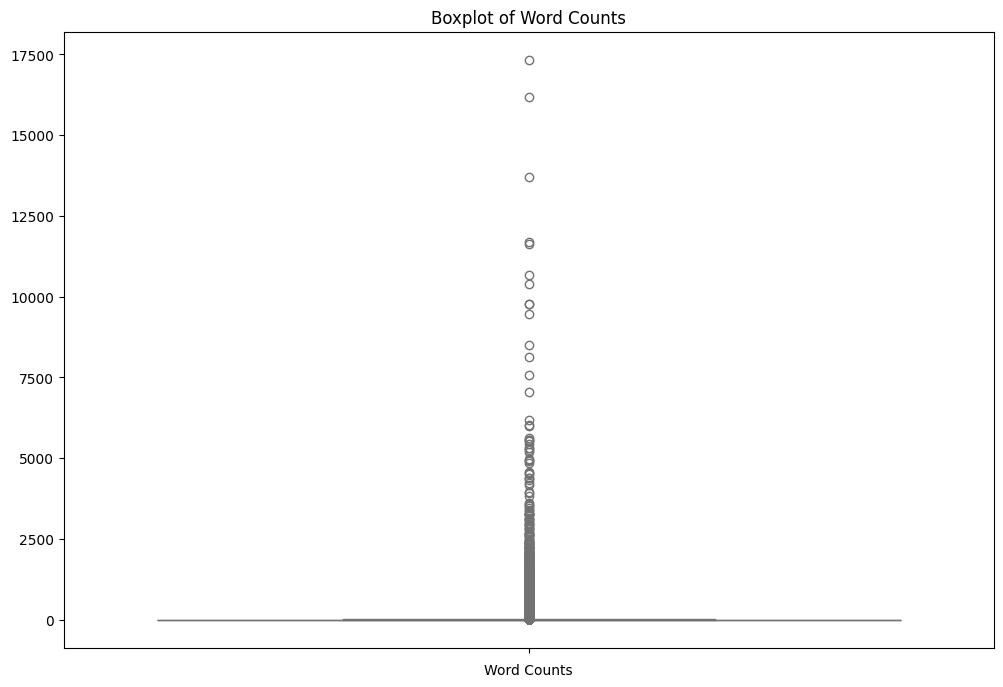

In [33]:
# See if there are outliers in occurrences
plt.figure(figsize=(12, 8))
sns.boxplot(list(word_occurrences(data_text).values()), palette="rainbow_r")
plt.xlabel("Word Counts")
plt.title("Boxplot of Word Counts")
plt.show()


Most words seem to be outliers. This means that a majority of words appear relatively few times in the dataset, whereas more common words appear significantly more often. This is a common pattern in natural language, and is known as Zipf's law.


In [34]:
occurrences = word_occurrences(data_text)

# Define limits as 10th and 90th percentiles
min_occurrences = round(pd.Series(occurrences).quantile(0.80))
max_occurrences = round(pd.Series(occurrences).quantile(0.99))

# Crush previous values because it ruins the search...
min_occurrences = round(pd.Series(occurrences).quantile(0))
max_occurrences = round(pd.Series(occurrences).quantile(1))


print(f"Words that appear less than {min_occurrences} times will be removed.")
print(f"Words that appear more than {max_occurrences} times will be removed.")

# Identify words that have more than max_occurrences occurrences
high_outliers = {
    word: count for word, count in occurrences.items() if count > max_occurrences
}

# Identify words that have less than min_occurrences occurrences
low_outliers = {
    word: count for word, count in occurrences.items() if count < min_occurrences
}

# print("High outliers:", high_outliers)
# print("Low outliers:", low_outliers)

# Remove words that are in high_outliers and low_outliers from 'text' column in data_text
data_text["text"] = data_text["text"].apply(
    lambda x: " ".join(
        [
            word
            for word in x.split()
            if word not in high_outliers and word not in low_outliers
        ]
    )
)


Words that appear less than 1 times will be removed.
Words that appear more than 17338 times will be removed.


In [35]:
before = len(occurrences)
after = len(word_occurrences(data_text))
difference = before - after

print(f"Number of unique words before removing outliers : {before:5.0f}")
print(f"Number of unique words after removing outliers  : {after:5.0f}")
print(f"Difference (number of words removed)            : {difference:5.0f}")


Number of unique words before removing outliers : 55587
Number of unique words after removing outliers  : 55587
Difference (number of words removed)            :     0


C:\Users\elyes\AppData\Local\Temp\ipykernel_20532\499328142.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(list(word_occurrences(data_text).values()), palette="rainbow_r")


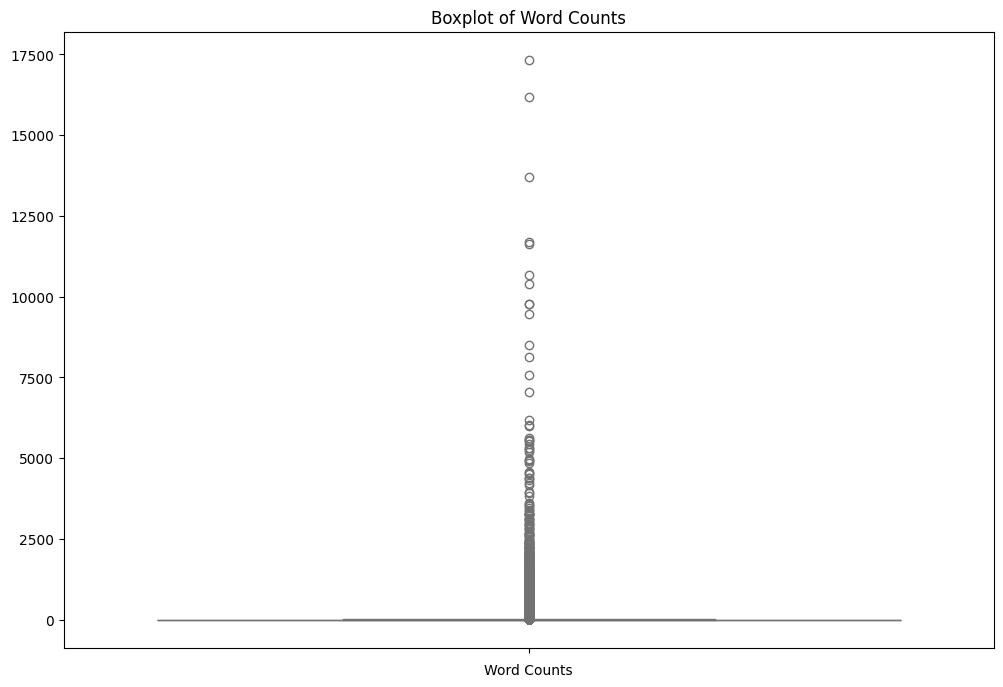

In [36]:
# See if there are outliers in occurrences
plt.figure(figsize=(12, 8))
sns.boxplot(list(word_occurrences(data_text).values()), palette="rainbow_r")
plt.xlabel("Word Counts")
plt.title("Boxplot of Word Counts")
plt.show()


With all that done and out of the way, let's save the data to a file and visualize what we're working with


c:\Users\elyes\Desktop\MALIA\NetworkAnalysis_SearchEngine\fonctions.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(plot_words), y=list(counts), palette="rainbow_r")


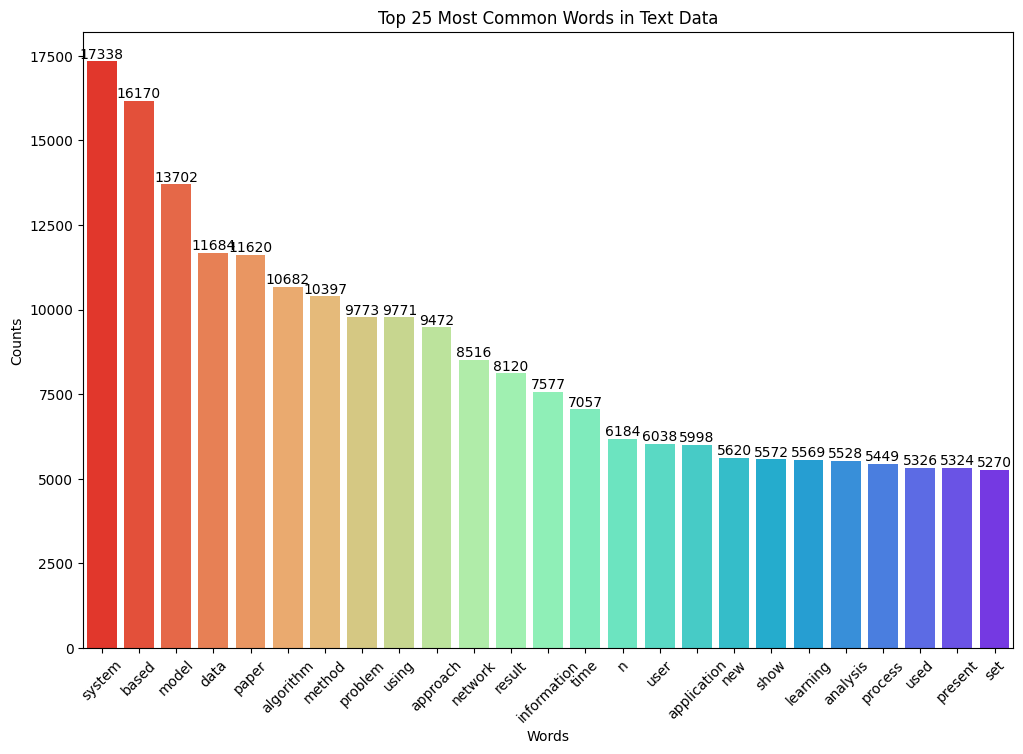

In [37]:
# Save data_text variable as a CSV file
data_text.to_csv("data_text.csv", index=False)

_ = word_occurrences(data_text, visualisation=True)


---

## Exercice 3: Mise en place du moteur de recherche

Nous allons maintenant construire la matrice Documents x Termes en adoprant le schéma de pondération TF-IDF


In [38]:
# Define the vectorizer
tf_vectorizer = TfidfVectorizer(use_idf=False)
tfidf_vectorizer = TfidfVectorizer(use_idf=True)

# Fit and transform the vectorizer on the 'text' column
X_tf = tf_vectorizer.fit_transform(data_text["text"])
X_tfidf = tfidf_vectorizer.fit_transform(data_text["text"])

# Show the shape of the resulting matrix
print(X_tf.shape)
print(X_tfidf.shape)


(40596, 55513)
(40596, 55513)


In [39]:
requete = "security and privacy in machine learning"

print_top5_cosine_similar_documents(
    requete, tf_vectorizer, tfidf_vectorizer, X_tf, X_tfidf, data_text, idf=True
)


Top 5 document IDs corresponding to your query: [38642 29891  2250 39347 26507]
Similarity scores for the found documents: [0.47185015 0.43306151 0.38312036 0.36302589 0.36029983]


,text,venue,abstract,authors,n_citation,references,title,year,id,class
38642,privacy security database solution,very large data bases,,['George I. Davida'],0,NaN,"Privacy, Security and Databases: Any Solutions?",1978,c5ec19e2-df7e-4316-858c-66dda8044e7f,2
29891,application in alignment calibration,international conference on robotics and autom...,,"['Xiaoying Kong', 'Eduardo Mario Nebot', 'Hugh...",0,NaN,Application in INS Alignment and Calibration.,1999,c5ca9947-a76e-4a76-8e6c-994a0d3edde2,1
2250,privacy web,information security for south africa,,['Wesley Brandi'],2,"['536ff266-96d5-47f8-80a1-9d6b3d0358ca', 'b071...",On Privacy And The Web.,2004,e3bea37c-8ce0-4ab4-8cbf-b647d1cbdd6a,5
39347,challenge opportunity security differential pr...,international conference on information system...,Differential Privacy has recently emerged as a...,"['Chris Clifton', 'Balamurugan Anandan']",6,"['1b383345-1644-4913-ae8a-f252d55cb074', '2e2d...",Challenges and Opportunities for Security with...,2013,1adcd7ba-b089-4de5-a627-28e08d86651c,5
26507,editorial digital investigation security privacy,Digital Investigation,,['Eoghan Casey'],0,NaN,"Editorial: Digital investigations, security an...",2010,2b34ba56-84bd-4d75-896d-df09f3ed54c4,5


In [40]:
print_top5_cosine_similar_documents(
    requete, tf_vectorizer, tfidf_vectorizer, X_tf, X_tfidf, data_text, idf=False
)


Top 5 document IDs corresponding to your query: [38642 26165 25141 30218 33050]
Similarity scores for the found documents: [0.4472136 0.4472136 0.4472136 0.4472136 0.4472136]


,text,venue,abstract,authors,n_citation,references,title,year,id,class
38642,privacy security database solution,very large data bases,,['George I. Davida'],0,NaN,"Privacy, Security and Databases: Any Solutions?",1978,c5ec19e2-df7e-4316-858c-66dda8044e7f,2
26165,machine learning relevance feedback,text retrieval conference,,"['Norbert Fuhr', 'Stephen Robertson']",1,NaN,Machine Learning and Relevance Feedback.,1992,24b533e3-2854-4bf3-b9c1-fa3dcde053b0,1
25141,learning hebrew root machine learning linguist...,empirical methods in natural language processing,,"['Ezra Daya', 'Dan Roth', 'Shuly Wintner']",17,"['33be5831-a974-427d-9f76-4dbfa4f9ebbe', '543e...",Learning Hebrew Roots: Machine Learning with L...,2004,8d45362d-3554-44a2-a64f-ca09cddcbda3,7
30218,machine learning credible classification,australian joint conference on artificial inte...,,"['Howard J. Hamilton', 'Ning Shan', 'Wojciech ...",53,"['0a3db0e1-415d-4481-b8fc-92dab5778294', '1d3a...",Machine Learning of Credible Classifications,1997,eb963c5d-05b3-4385-a6cd-6b1614397777,1
33050,sparse representation machine learning,canadian conference on artificial intelligence,,['Yifeng Li'],3,"['0276576b-4fc9-42c5-b3d2-264e8b1d0d75', '06dc...",Sparse Representation for Machine Learning,2013,3be5b6aa-8171-4ec6-8c2d-142b332bd66b,2


In [41]:
print_top5_euclidian_similar_documents(
    requete, tf_vectorizer, tfidf_vectorizer, X_tf, X_tfidf, data_text
)


TF    : [27094 38642 30218 26165 25141] | [1.         1.05146222 1.05146222 1.05146222 1.05146222]


,text,venue,abstract,authors,n_citation,references,title,year,id,class
27094,,parallel computing,,"['Jesper Larsson Träff', 'Robert A. van de Gei...",50,"['0765c622-f55e-4ba5-8d32-1326a490941a', '1de3...",All-to-All,2011,706de0e6-2452-4eb7-af56-9286f4ebaad2,5
38642,privacy security database solution,very large data bases,,['George I. Davida'],0,NaN,"Privacy, Security and Databases: Any Solutions?",1978,c5ec19e2-df7e-4316-858c-66dda8044e7f,2
30218,machine learning credible classification,australian joint conference on artificial inte...,,"['Howard J. Hamilton', 'Ning Shan', 'Wojciech ...",53,"['0a3db0e1-415d-4481-b8fc-92dab5778294', '1d3a...",Machine Learning of Credible Classifications,1997,eb963c5d-05b3-4385-a6cd-6b1614397777,1
26165,machine learning relevance feedback,text retrieval conference,,"['Norbert Fuhr', 'Stephen Robertson']",1,NaN,Machine Learning and Relevance Feedback.,1992,24b533e3-2854-4bf3-b9c1-fa3dcde053b0,1
25141,learning hebrew root machine learning linguist...,empirical methods in natural language processing,,"['Ezra Daya', 'Dan Roth', 'Shuly Wintner']",17,"['33be5831-a974-427d-9f76-4dbfa4f9ebbe', '543e...",Learning Hebrew Roots: Machine Learning with L...,2004,8d45362d-3554-44a2-a64f-ca09cddcbda3,7


Talk about :

- TF requiring stopwords removed, and TDIDF requiring stop words not removed
- Euclidian distances donc function in higher dimensions (if you do TF and TFIDF scores with euclidian distances, you'll get the exact same score every time (curse of high dimensionnality))
- Don't remove stopwords ?


In [42]:
# save X_tf and X_tfidf as numpy matrix
np.save("X_tf.npy", X_tf)
np.save("X_tfidf.npy", X_tfidf)
